In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
!ls ../ex2

costFunction.m         ex2data2.txt           predict.m
costFunctionReg.m      lib                    sigmoid.m
ex2.m                  mapFeature.m           submit.m
ex2_reg.m              plotData.m
ex2data1.txt           plotDecisionBoundary.m


In [16]:
df = pd.read_csv('../ex2/ex2data1.txt', 
                 header=None, 
                 names=['exam1', 'exam2', 'admitted'])
df['intercept'] = 1
X = df[['intercept', 'exam1', 'exam2']]
y = df.admitted
print(X.shape)
X.head()

(100, 3)


,intercept,exam1,exam2
0,1,34.623660,78.024693
1,1,30.286711,43.894998
2,1,35.847409,72.902198
3,1,60.182599,86.308552
4,1,79.032736,75.344376


# 1.1 Visualization of the data

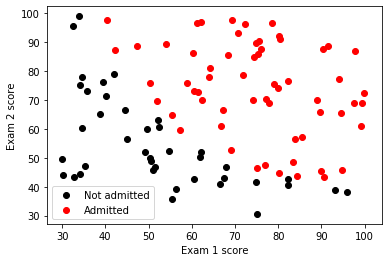

In [17]:
plt.scatter(X.exam1[y == 0], X.exam2[y == 0], c='k', label='Not admitted')
plt.scatter(X.exam1[y == 1], X.exam2[y == 1], c='r', label='Admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend();

In [5]:
X = X.values

# 1.2 Implementation
## 1.2.1 Sigmoid Function

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

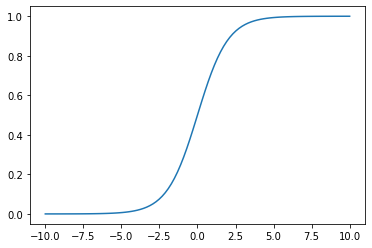

In [7]:
# Test
z = np.linspace(-10, 10, 100)
sig = [sigmoid(x) for x in z]
plt.plot(z, sig);

In [8]:
def predict(theta, X):
    return sigmoid(X @ theta).reshape(-1)

In [9]:
def log_loss(theta, X, y):
    m = X.shape[0]
    preds = predict(theta, X)
    loss = (-y*np.log(preds) - (1 - y)*np.log(1 - preds)).sum() / m
    return loss

In [10]:
def get_grad(theta, X, y):
    m = X.shape[0]
    preds = predict(theta, X)
    grad = ((preds - y) @ X) / m  
    return grad.reshape(theta.shape)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


theta: [0.8098, 0.9679, 0.4748]	loss: inf
theta: [0.7918, 0.0249, -0.0244]	loss: 0.715917478
theta: [0.7841, 0.0050, -0.0056]	loss: 0.687215658
theta: [0.7765, 0.0051, -0.0056]	loss: 0.686630365
theta: [0.7689, 0.0051, -0.0055]	loss: 0.686046062
theta: [0.7612, 0.0052, -0.0054]	loss: 0.685462745
theta: [0.7536, 0.0052, -0.0054]	loss: 0.684880413
theta: [0.7460, 0.0053, -0.0053]	loss: 0.684299065
theta: [0.7383, 0.0053, -0.0053]	loss: 0.683718699
theta: [0.7307, 0.0054, -0.0052]	loss: 0.683139313
theta: [0.7231, 0.0054, -0.0051]	loss: 0.682560908
theta: [0.7155, 0.0055, -0.0051]	loss: 0.681983480
theta: [0.7079, 0.0055, -0.0050]	loss: 0.681407029
theta: [0.7004, 0.0056, -0.0050]	loss: 0.680831554
theta: [0.6928, 0.0056, -0.0049]	loss: 0.680257053
theta: [0.6852, 0.0057, -0.0049]	loss: 0.679683525
theta: [0.6776, 0.0058, -0.0048]	loss: 0.679110968
theta: [0.6701, 0.0058, -0.0047]	loss: 0.678539381
theta: [0.6625, 0.0059, -0.0047]	loss: 0.677968762
theta: [0.6550, 0.0059, -0.0046]	loss: 0

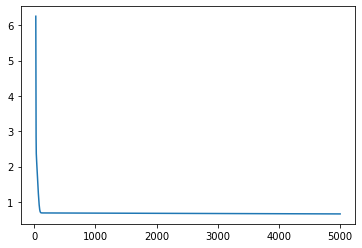

In [13]:
ITERS = 5000
ALPHA = 0.001

theta = np.random.rand(3).reshape([3, 1])
losses = []
for i in range(ITERS):
    loss = log_loss(theta, X, y)
    losses.append(loss)
    if i % 100 == 0:
        print(f'theta: [{theta[0, 0]:.4f}, {theta[1, 0]:.4f}, '
              f'{theta[2, 0]:.4f}]\tloss: {loss:.9f}')
    grad = get_grad(theta, X, y)
    theta -= (ALPHA * grad)
    #ALPHA *= 0.96
    
plt.plot(losses);

In [14]:
theta

array([[ 0.4241706 ],
       [ 0.00749355],
       [-0.0028385 ]])

In [221]:
preds = predict(theta, X)
preds

array([0.6094674 , 0.64732596, 0.61846537, 0.64191699, 0.68629294,
       0.65571795, 0.63006386, 0.71446268, 0.66663085, 0.73157689,
       0.7532049 , 0.73255405, 0.69001083, 0.64235901, 0.62059036,
       0.62764411, 0.69821062, 0.70371302, 0.65072696, 0.71617157,
       0.70737416, 0.71388676, 0.67397397, 0.653403  , 0.69231453,
       0.66634379, 0.72402382, 0.74886334, 0.6900403 , 0.63396441,
       0.66128383, 0.71767526, 0.65850273, 0.65030581, 0.62826179,
       0.67632515, 0.57971615, 0.65551299, 0.71985031, 0.61246791,
       0.71631828, 0.67807111, 0.72116866, 0.73188222, 0.67855893,
       0.6884565 , 0.68937913, 0.7014756 , 0.63135844, 0.68956365,
       0.68915566, 0.73327094, 0.74036286, 0.63283972, 0.6723924 ,
       0.65862077, 0.72208643, 0.58186997, 0.68555711, 0.67098355,
       0.66758998, 0.65155385, 0.69470615, 0.63952585, 0.64192582,
       0.70820587, 0.59307666, 0.66783495, 0.6674555 , 0.68461889,
       0.65211223, 0.65896585, 0.6492491 , 0.65941727, 0.65323

In [218]:
def pred_absolute(thresh, preds):
    preds = map(lambda x: 1 if x >= thresh else 0, preds)
    return list(preds)

In [224]:
def get_accuracy(y, preds):
    return (y == preds).sum() / len(y)

In [232]:
def optimize_threshold(y, preds):
    best_acc = 0
    accs = []
    best_threshold = 0.5
    thresholds = np.linspace(0.2, 0.8, 100)
    for thresh in thresholds:
        abs_preds = pred_absolute(thresh, preds)
        acc = get_accuracy(y, abs_preds)
        if acc > best_acc:
            best_acc = acc
            best_threshold = thresh
        accs.append(acc)
    plt.plot(thresholds, accs)
    return best_threshold

0.6242424242424243

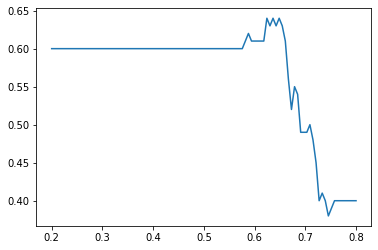

In [233]:
optimize_threshold(y, preds)